In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn as sns


In [95]:
file = pd.read_csv("/content/drive/MyDrive/wine-clustering.csv")

In [96]:
file.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [97]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


##k_means

In [98]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,15))


In [99]:
x = file.iloc[:,:].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(cus)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [100]:
y_means

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 2, 1, 2, 1,
       1, 2, 4, 1, 4, 1, 4, 1, 1, 2, 2, 4, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 1, 4, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 4, 2, 1,
       1, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 4, 1, 2, 2, 4, 2, 4, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [103]:
x[y_means == 2,1]

array([0.94, 1.25, 1.45, 1.17, 1.88, 0.9 , 0.92, 1.13, 0.98, 1.61, 1.67,
       1.33, 2.83, 1.99, 1.41, 2.08, 1.34, 2.45, 1.72, 1.73, 1.73, 1.29,
       2.43, 0.74, 1.39, 1.51, 1.47, 1.61, 3.43, 2.4 , 2.16, 1.53, 1.63])

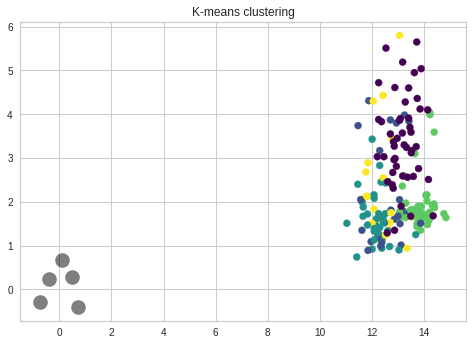

In [104]:
plt.scatter(x[:, 0], x[:, 1], c=y_means, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-means clustering')
plt.show()

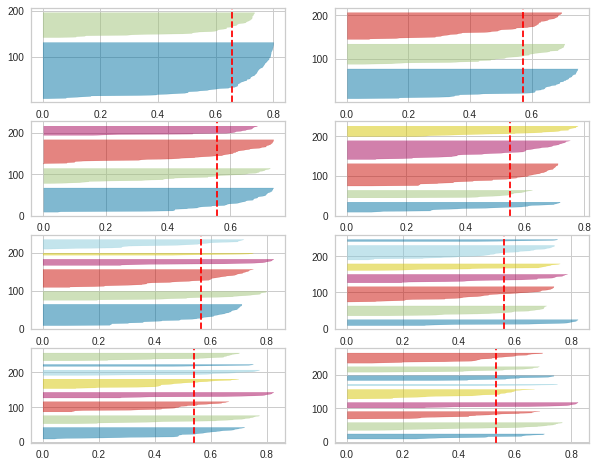

In [106]:
fig, ax = plt.subplots(4, 2, figsize=(10,8))
for i in [2,3, 4, 5, 6,7,8,9]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x) 

In [107]:
score = silhouette_score(x, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.048


In [108]:
sc = StandardScaler()

xsc = sc.fit_transform(file)
xnor = normalize(xsc)

cus = pd.DataFrame(xnor)

In [109]:
pca = PCA(n_components = 2)
Xpr = pca.fit_transform(cus)
cus = pd.DataFrame(Xpr)
cus.columns = ['X1','X2']
cus.head()

,X1,X2
0,-0.832433,-0.318834
1,-0.639443,0.091947
2,-0.756882,-0.243317
3,-0.805447,-0.510057
4,-0.373903,-0.311604


In [110]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(cus)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
y_means

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 2, 1, 2, 1,
       1, 2, 4, 1, 4, 1, 4, 1, 1, 2, 2, 4, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 1, 4, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 4, 2, 1,
       1, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 4, 1, 2, 2, 4, 2, 4, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [112]:
x[y_means == 3,0]

array([14.23, 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83, 13.86,
       14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83, 14.19,
       13.64, 14.06, 13.71, 13.39, 13.87, 14.02, 13.73, 13.58, 13.68,
       13.76, 13.51, 13.48, 13.28, 13.05, 14.22, 13.56, 13.88, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72])

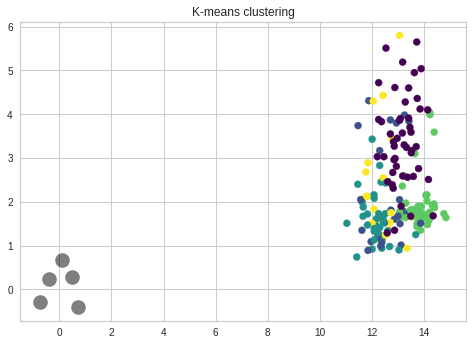

In [113]:
plt.scatter(x[:, 0], x[:, 1], c=y_means, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-means clustering')
plt.show()

In [114]:
score = silhouette_score(cus, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.506


##Hierarchial

In [115]:
x = file.iloc[:,:].values

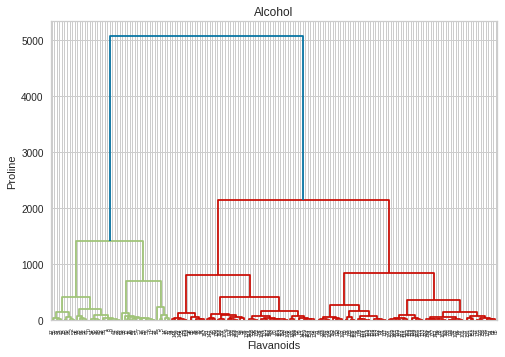

In [118]:
import scipy.cluster.hierarchy as shc 
from scipy.cluster.hierarchy import dendrogram, linkage
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Alcohol")  
plt.ylabel("Proline")  
plt.xlabel("Flavanoids")  
plt.show() 

In [119]:
sc = StandardScaler()

xsc = sc.fit_transform(file)
xnor = normalize(xsc)

cus = pd.DataFrame(xnor)

In [127]:
pca = PCA(n_components = 2)
Xpr = pca.fit_transform(x)
cus = pd.DataFrame(Xpr)
cus.columns = ['X1','X2']
cus.head()

,X1,X2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [128]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, metric = 'euclidean', linkage= 'ward')
cluster.fit_predict(cus)

array([3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 5, 1, 1,
       3, 3, 5, 5, 3, 0, 5, 3, 0, 0, 3, 0, 3, 5, 5, 3, 3, 1, 1, 3, 3, 1,
       5, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 4, 1, 2, 1, 2, 2, 1,
       4, 4, 1, 1, 5, 2, 4, 3, 5, 2, 2, 4, 1, 2, 2, 1, 1, 4, 4, 2, 4, 4,
       1, 1, 4, 2, 4, 2, 2, 3, 1, 2, 1, 2, 1, 4, 2, 2, 1, 2, 4, 4, 2, 1,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 1, 4, 2, 2, 2, 2, 2, 4, 2, 4, 1, 4,
       4, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 4, 5, 5, 2, 1, 1, 4, 4, 4, 2, 1,
       1, 1, 4, 5, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 5,
       5, 4])

In [129]:
cl = cluster.fit_predict(cus)

In [130]:
from sklearn.metrics import silhouette_score

In [131]:
silhouette_score(cus,cl)

0.5254200188052991

In [132]:
x = cus.values

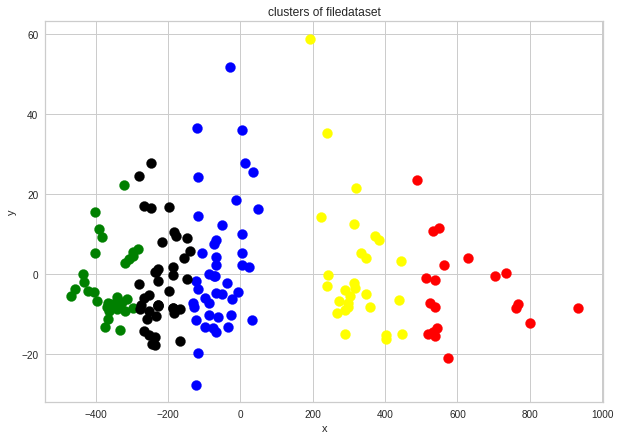

In [133]:
plt.figure(figsize=(10,7))
plt.scatter(x[cl==0,0], x[cl==0,1],s=100,c='red',label= 'Cluster1')
plt.scatter(x[cl==1,0], x[cl==1,1],s=100,c='blue',label= 'Cluster2')
plt.scatter(x[cl==2,0], x[cl==2,1],s=100,c='green',label= 'Cluster3')
plt.scatter(x[cl==3,0], x[cl==3,1],s=100,c='yellow',label= 'Cluster4')
plt.scatter(x[cl==4,0], x[cl==4,1],s=100,c='black',label= 'Cluster5')
plt.title("clusters of filedataset")
plt.xlabel('x')
plt.ylabel('y')
plt.show()